# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
import matplotlib.pyplot as plt
import wetting

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

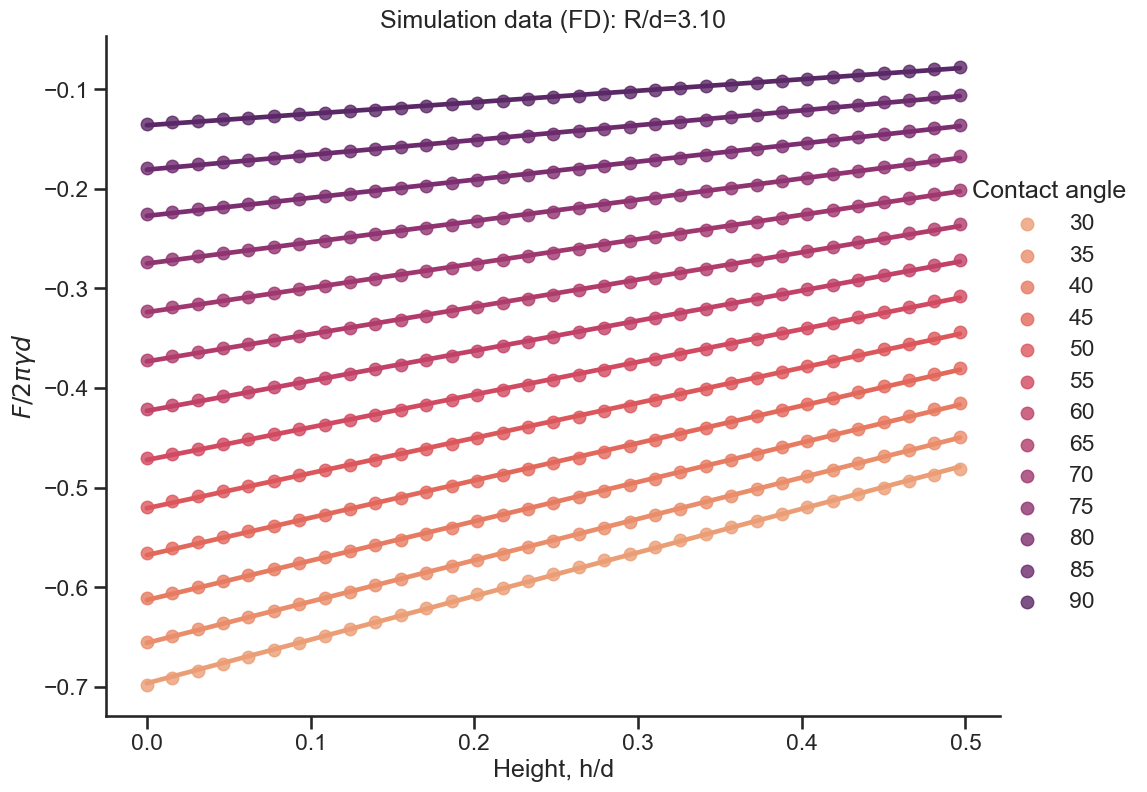

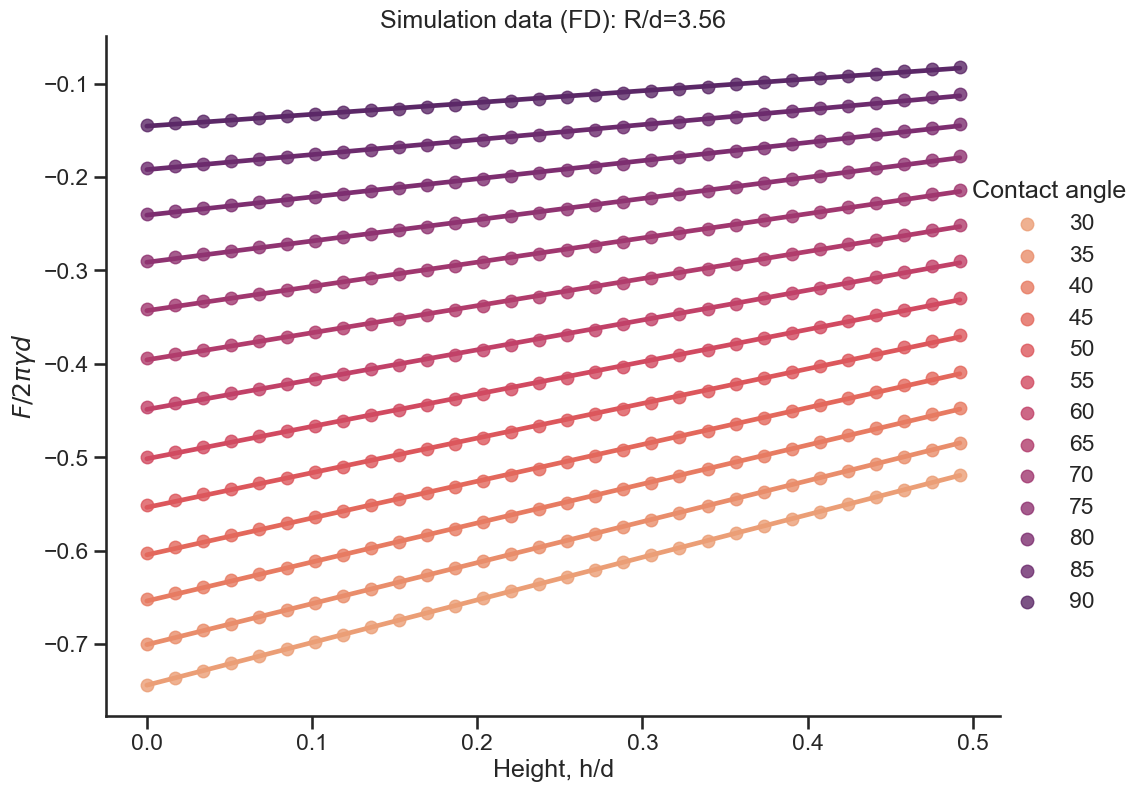

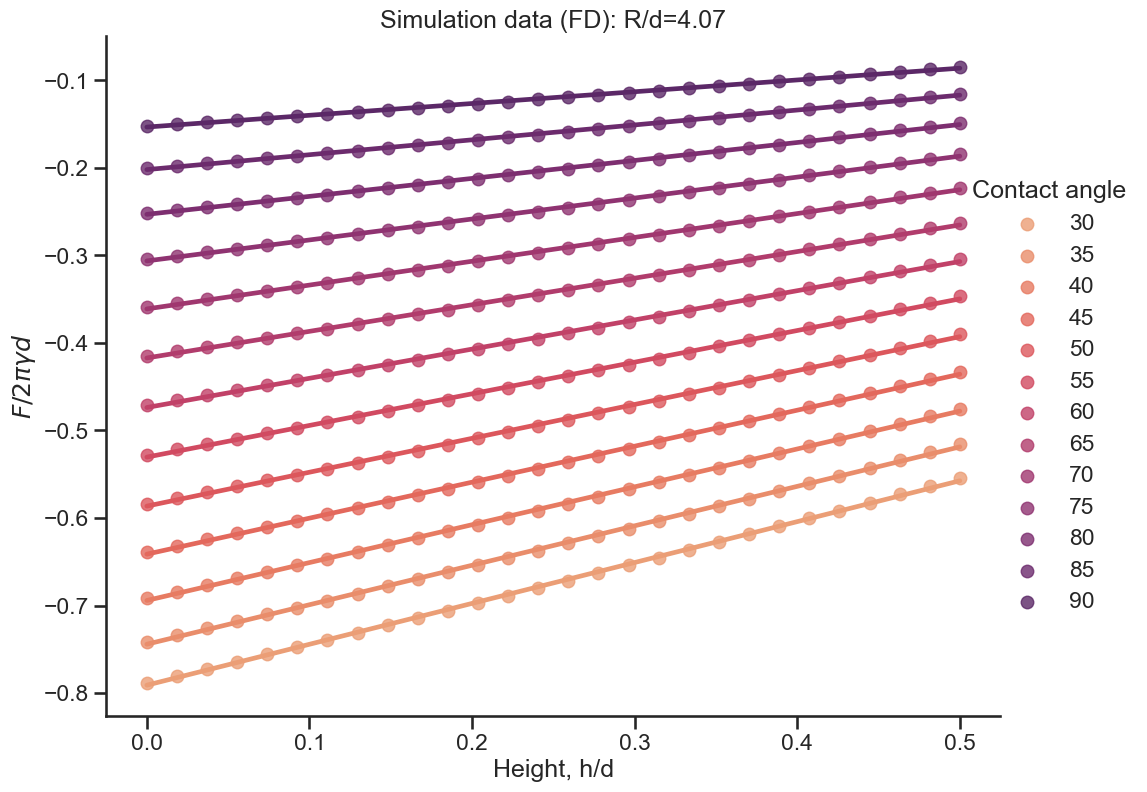

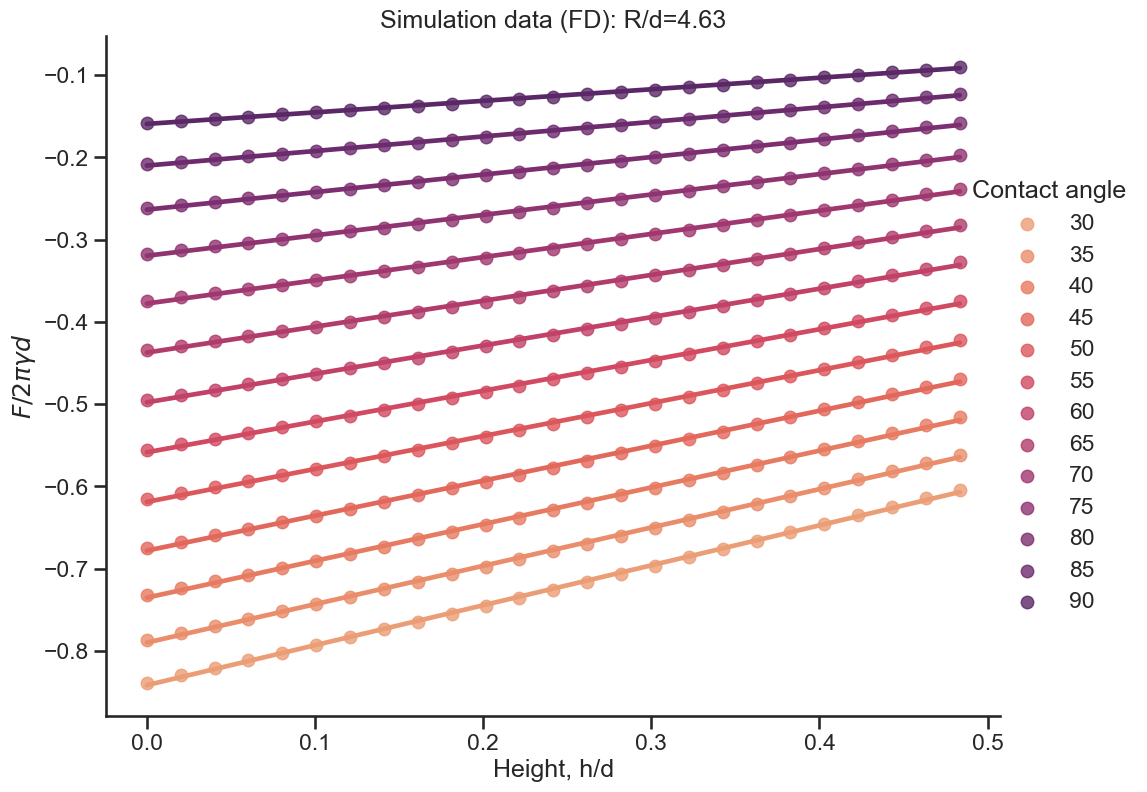

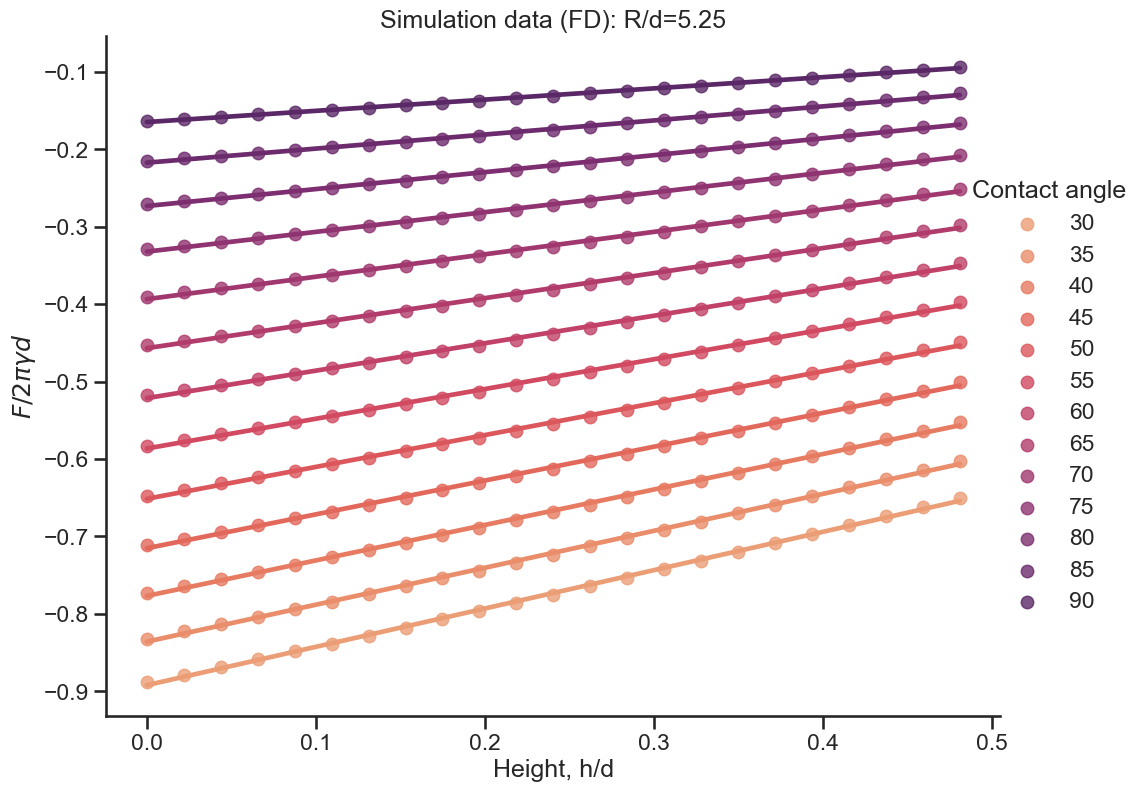

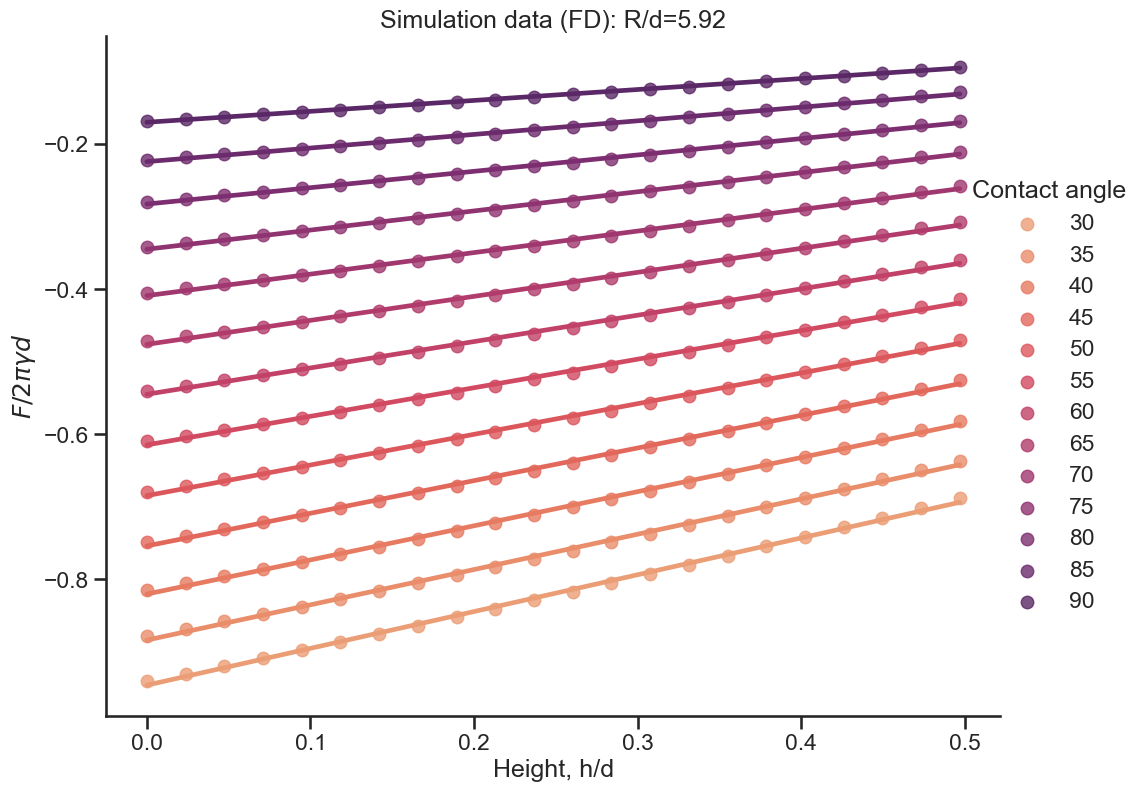

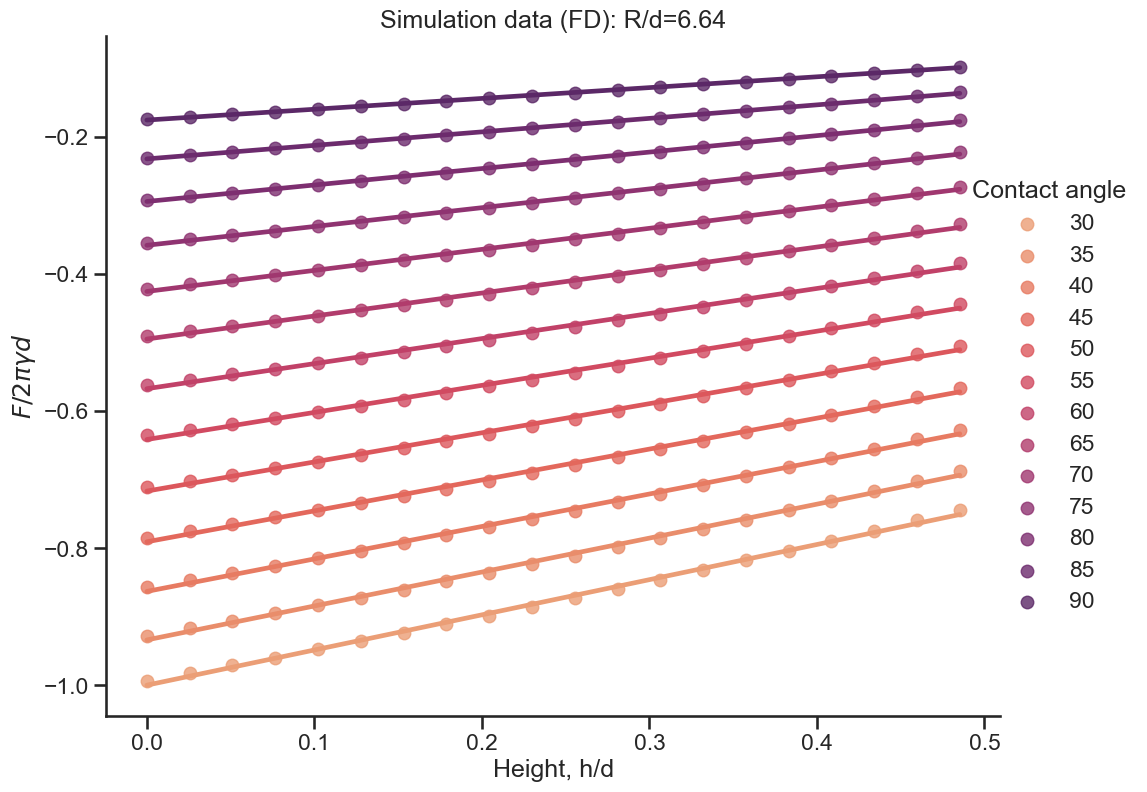

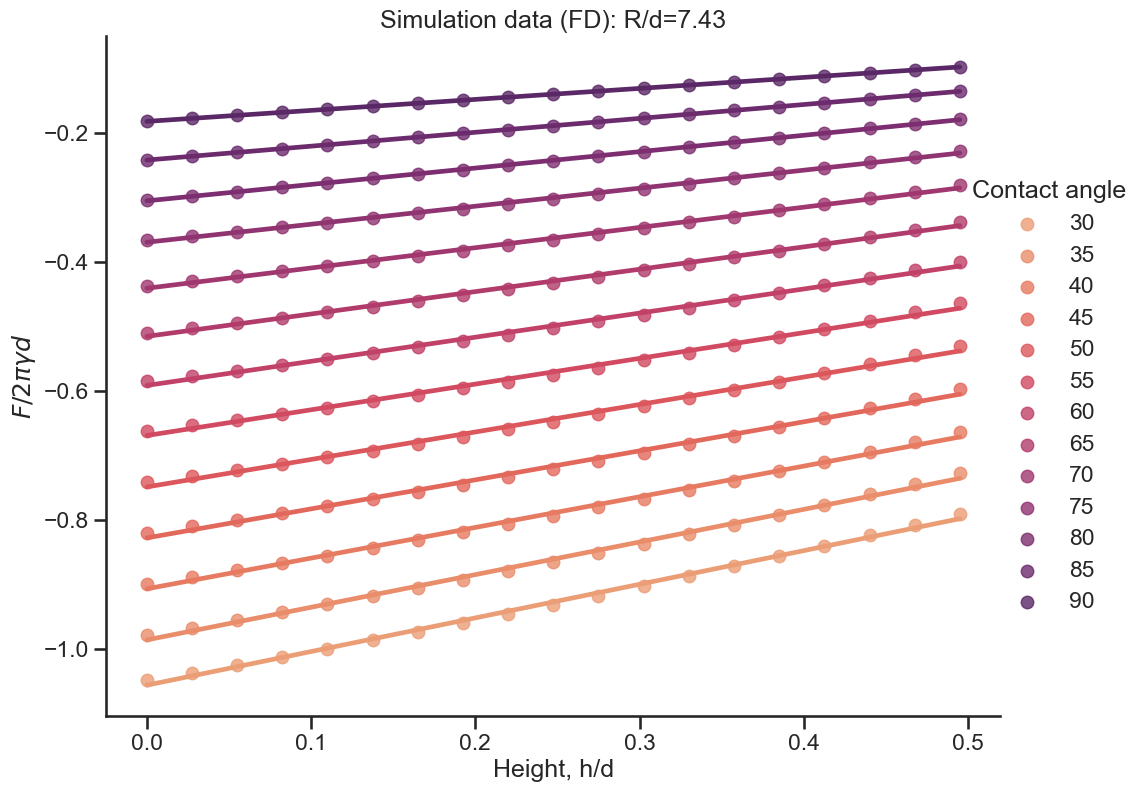

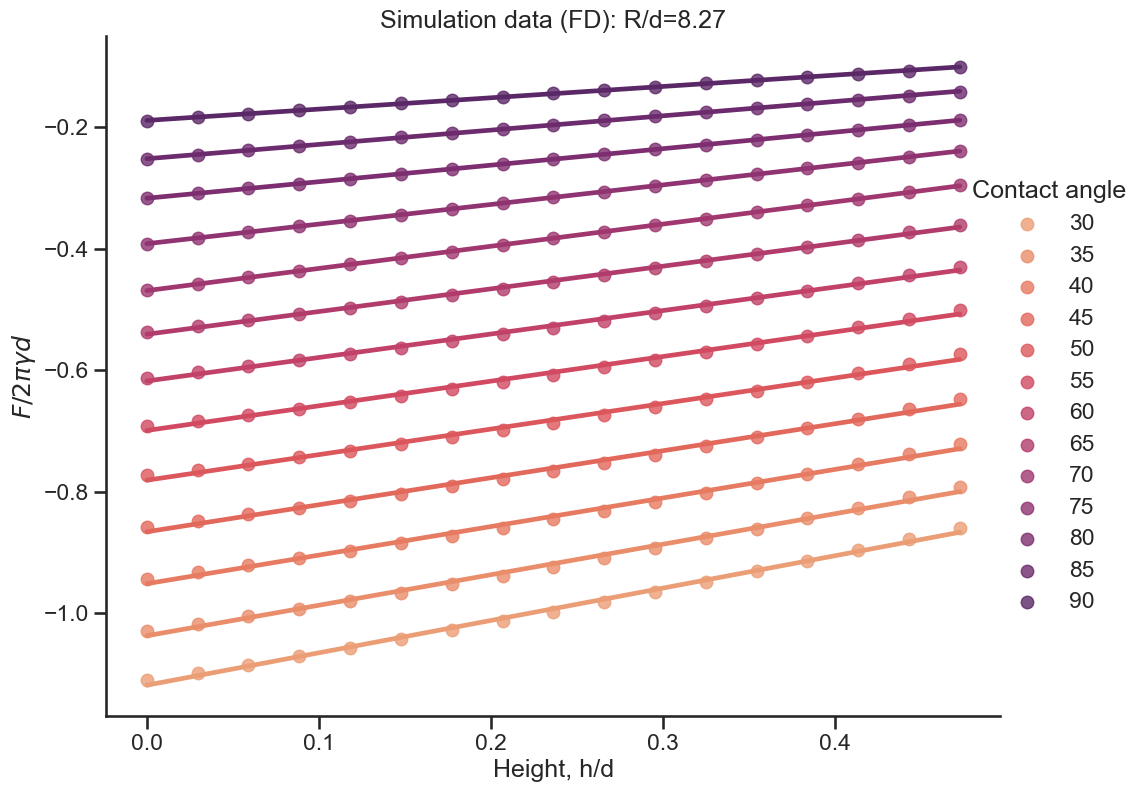

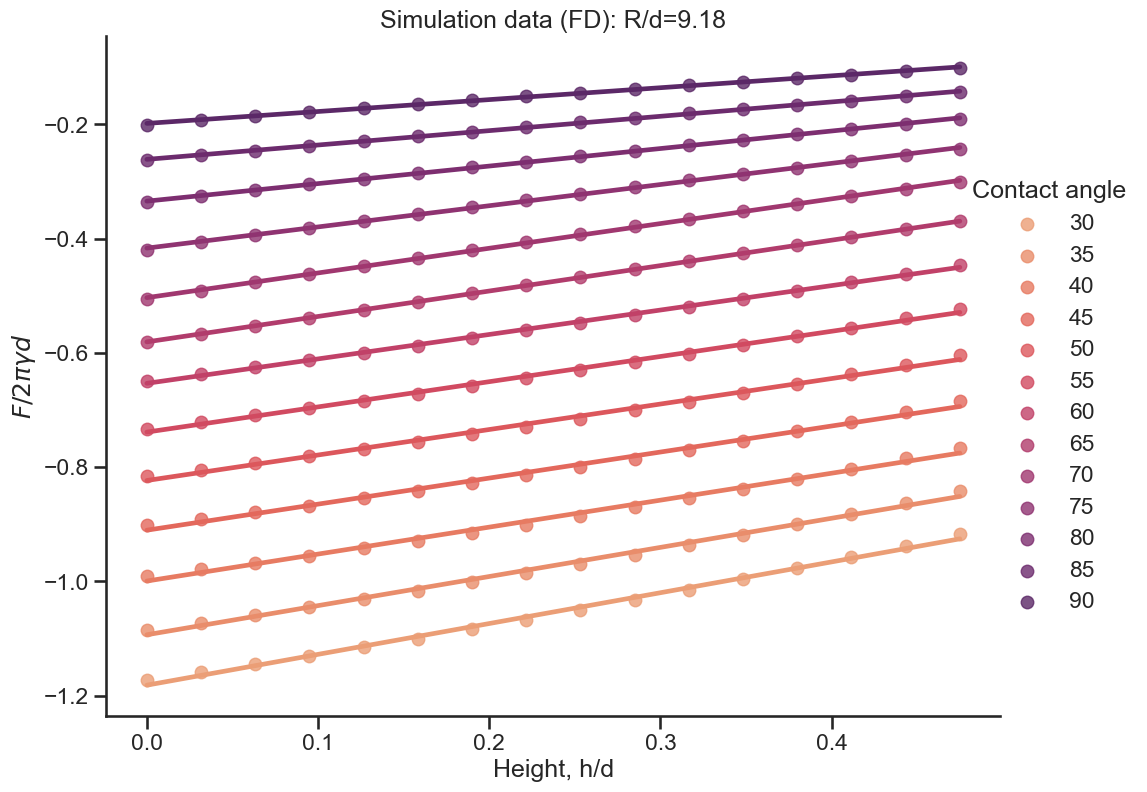

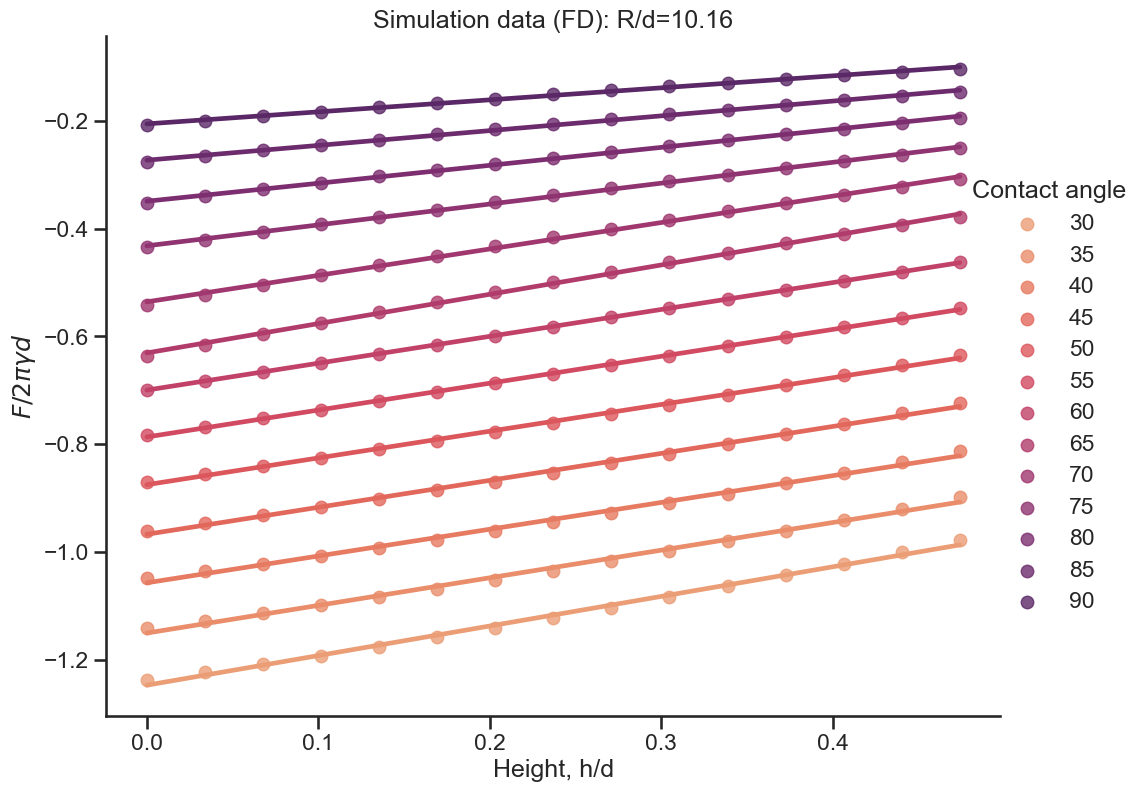

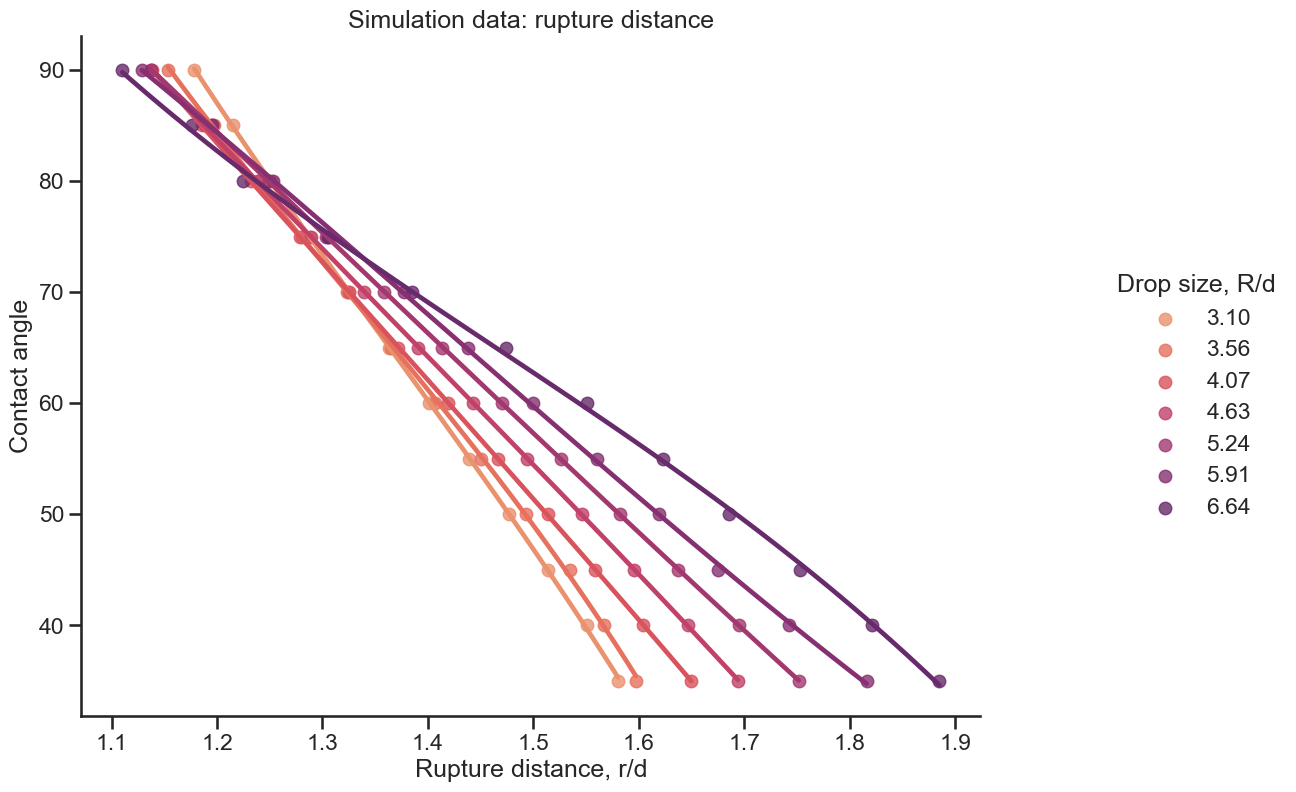

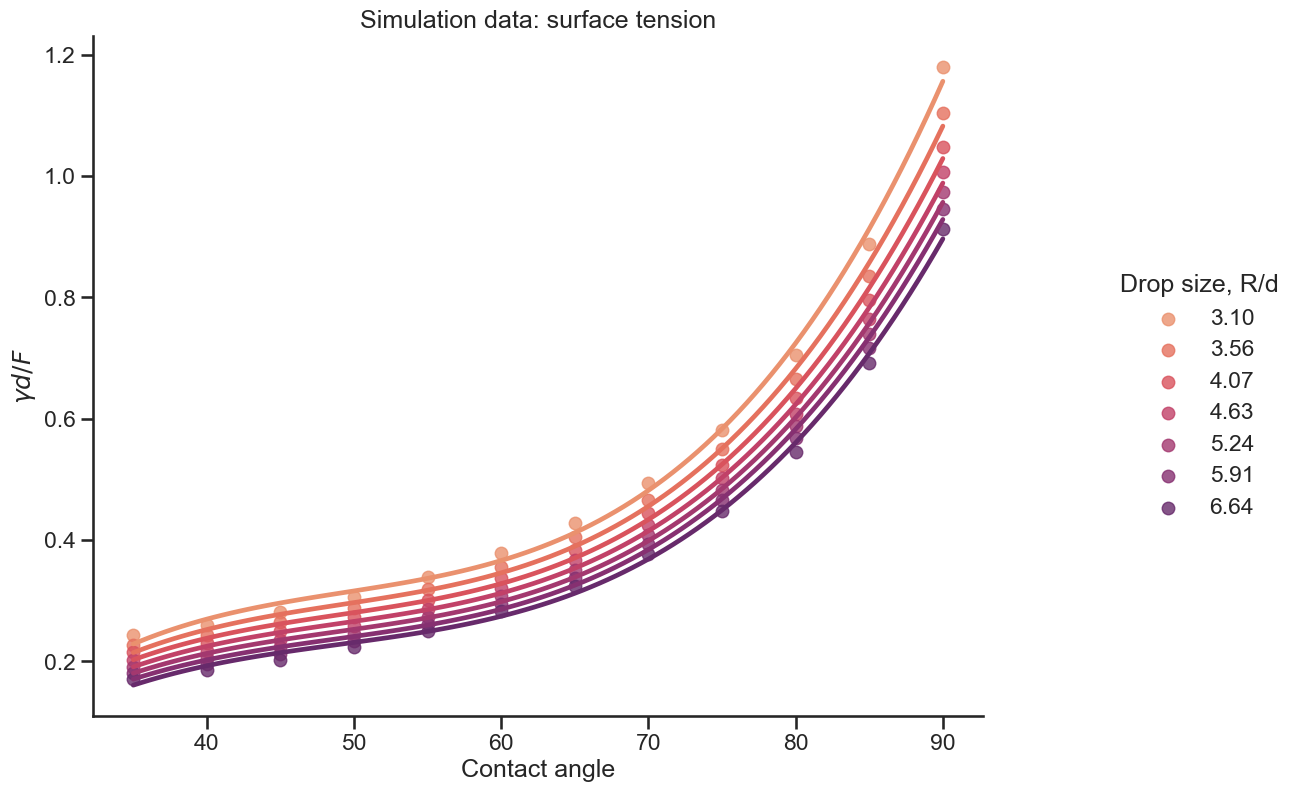

In [4]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = wetting.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [2]:
img_file_path, _ = QFileDialog.getOpenFileName(caption='Select JPK/QI data') #JPK image data (*.jpk or *.jpk-qi-data)
#file_path = 'data/qi-area2-data-2021.07.10-19.22.05.499.jpk-qi-data'
fd_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK force data') #JPK force data (*.jpk-force)
#fd_file_paths = ['../20210420 silicone oil tip-pdms brush/force-save-area4-f2_s10-2021.04.20-17.57.38.004.jpk-force']
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder

#make output directory
if output_dir == '':
    output_dir = os.path.dirname(img_file_path) + '/analysis'
file_name = os.path.basename(img_file_path)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
output_path = f'{output_dir}/{file_name}_results_{timestamp}'
os.makedirs(output_path, exist_ok=True)

print('Image data:\n', img_file_path, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_path)

Image data:
 E:/Work/AFM/codes/data/save-area3-2021.11.25-20.41.54.520.jpk 
Force data:
 ['E:/Work/AFM/codes/data/force-save_area3_drops-2021.11.25-20.54.12.050.jpk-force'] 
Output folder:
 E:/Work/AFM/codes/data/analysis/save-area3-2021.11.25-20.41.54.520.jpk_results_220512-165018


## AFM image

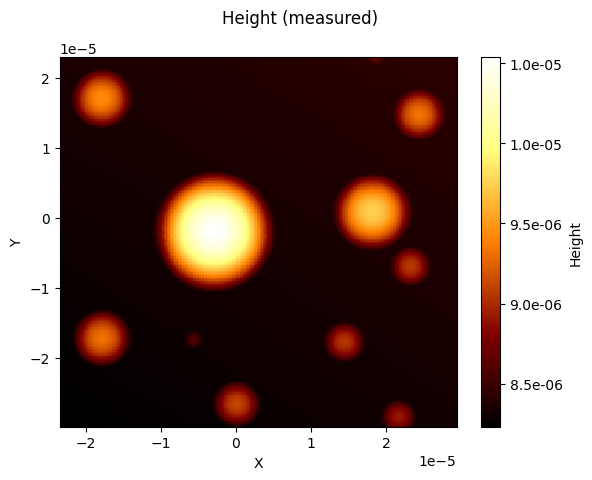

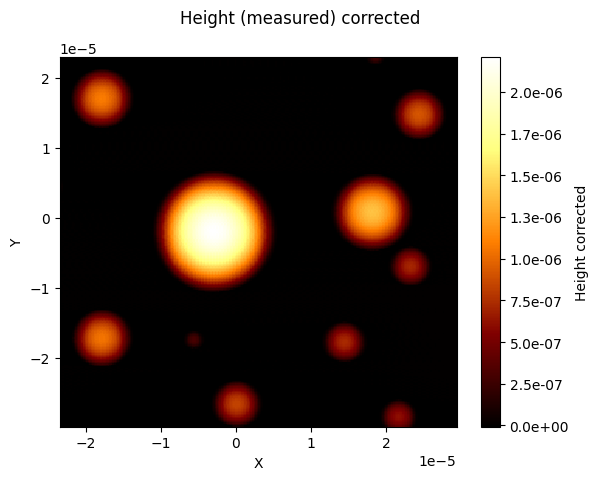

In [9]:
plt.close('all')
afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, level_order=2)
for fig in fig_list:
    display(fig)

## Get liquid drop properties

rupture distance 8.851991607179442e-07
FD wetted length: 8.717374441249299e-07
energy 2 1.2389632212969662e-14


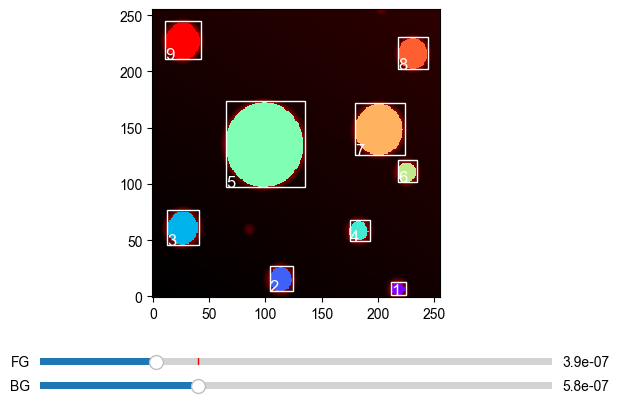

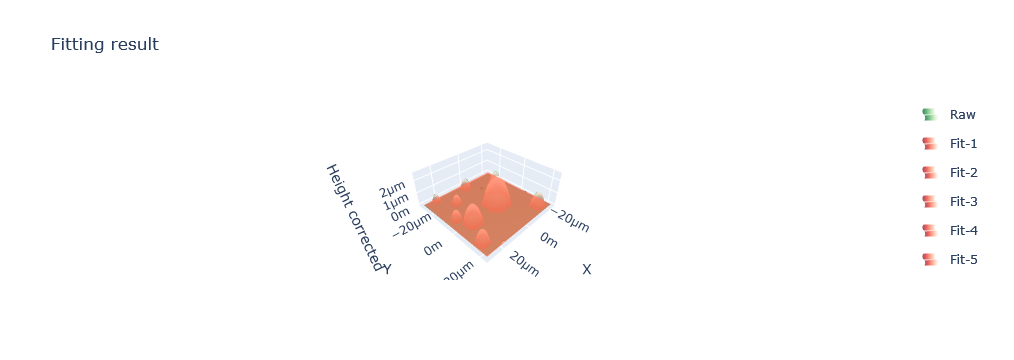

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000006        0.000002  5.462137e-07    5.547582e-07   
1      2   0.000008        0.000003  7.295433e-07    7.490270e-07   
2      3   0.000009        0.000004  9.421863e-07    9.583990e-07   
3      4   0.000006        0.000003  6.780353e-07    6.790016e-07   
4      5   0.000018        0.000009  2.133150e-06    2.170792e-06   
5      6   0.000007        0.000003  6.869787e-07    7.039248e-07   
6      7   0.000012        0.000005  1.390701e-06    1.396474e-06   
7      8   0.000008        0.000004  9.622677e-07    9.641058e-07   
8      9   0.000009        0.000004  1.063964e-06    1.071053e-06   

         Volume    Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  \
0  5.198420e-18  2.340548e-18           25.224330         None   0.000000e+00   
1  1.352468e-17  8.850369e-18           24.155413         None   3.218169e-08   
2  2.476747e-17  1.956163e-17           26.164387         None   0.000000e+00   
3  8.821222e-18  5.782423e-18           26.754018         None   0.000000e+00   
4  2.496329e-16  2.361735e-16           28.039465         None   0.000000e+00   
5  9.873266e-18  5.989501e-18           25.806716         None   0.000000e+00   
6  6.725167e-17  6.130699e-17           28.429345         None   0.000000e+00   
7  2.132245e-17  1.763185e-17           29.046801         None   0.000000e+00   
8  3.101729e-17  2.628620e-17           28.020914         None   0.000000e+00   

   Slope (FD)  Wetted length (FD)  Rupture distance (FD)  \
0    0.000000        0.000000e+00           0.000000e+00   
1    0.032207        8.717374e-07           8.851992e-07   
2    0.000000        0.000000e+00           0.000000e+00   
3    0.000000        0.000000e+00           0.000000e+00   
4    0.000000        0.000000e+00           0.000000e+00   
5    0.000000        0.000000e+00           0.000000e+00   
6    0.000000        0.000000e+00           0.000000e+00   
7    0.000000        0.000000e+00           0.000000e+00   
8    0.000000        0.000000e+00           0.000000e+00   

   Adhesion energy (FD)  FD X position  FD Y position  \
0          0.000000e+00   0.000000e+00       0.000000   
1          1.238963e-14  -1.443661e-07      -0.000027   
2          0.000000e+00   0.000000e+00       0.000000   
3          0.000000e+00   0.000000e+00       0.000000   
4          0.000000e+00   0.000000e+00       0.000000   
5          0.000000e+00   0.000000e+00       0.000000   
6          0.000000e+00   0.000000e+00       0.000000   
7          0.000000e+00   0.000000e+00       0.000000   
8          0.000000e+00   0.000000e+00       0.000000   

                                             FD file         s       R/d  \
0                                                     0.000001  4.469285   
1  E:/Work/AFM/codes/data/force-save_area3_drops-...  0.000001  4.673454   
2                                                     0.000002  4.303302   
3                                                     0.000001  4.205045   
4                                                     0.000004  4.004905   
5                                                     0.000001  4.365054   
6                                                     0.000003  3.947710   
7                                                     0.000002  3.860208   
8                                                     0.000002  4.007665   

                                            AFM file  
0  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
1  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
2  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
3  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
4  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
5  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
6  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
7  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  
8  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...

In [8]:
plt.close('all')
#drop analysis of AFM data
drop_df, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_path, fd_file_paths,
                                          force_cycle='approach')
drop_df['AFM file'] = img_file_path
for fig in fig_list:
    display(fig)
display(drop_df)

## Droplet surface tension calculation

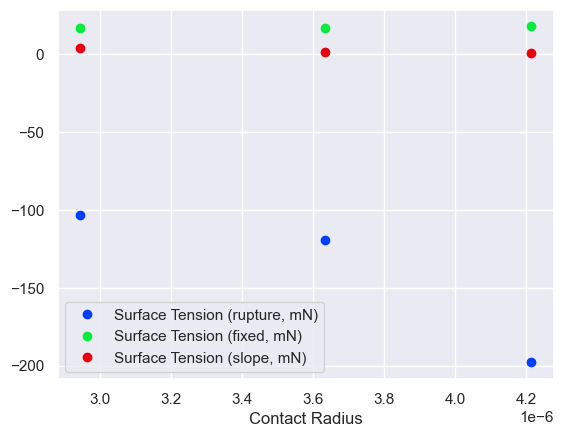

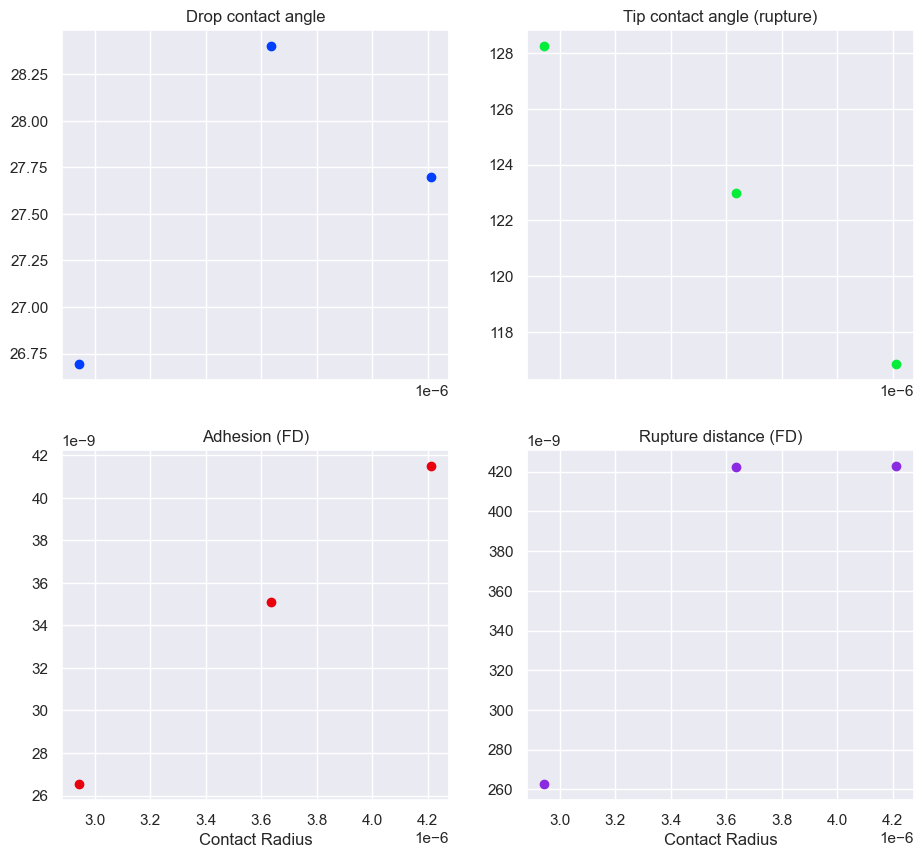

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
2      3   0.000009        0.000004  1.038700e-06    1.054966e-06   
5      6   0.000007        0.000003  6.985132e-07    7.133968e-07   
7      8   0.000008        0.000004  9.196690e-07    9.214053e-07   

         Volume    Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  \
2  2.954967e-17  2.507356e-17           27.698212         None   4.149640e-08   
5  9.690643e-18  6.844540e-18           26.691858         None   2.652520e-08   
7  1.948744e-17  1.665587e-17           28.401818         None   3.512261e-08   

   ...       R/d                                           AFM file  \
2  ...  4.056260  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...   
5  ...  4.215202  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...   
7  ...  3.951698  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...   

   Simulation R/s  Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
2        4.073223                    -198.004685                   116.838103   
5        4.073223                    -103.534824                   128.251471   
7        4.073223                    -119.273216                   122.993875   

   F_fit_actual Surface Tension (fixed, mN)  Tip contact angle (fixed)  \
2      0.032112                   17.721416                       70.0   
5      0.058374                   16.844660                       70.0   
7      0.050960                   16.940781                       70.0   

   F_fit_fixed                                    Simulation file  
2    -0.358791  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5    -0.358791  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
7    -0.358791  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[3 rows x 28 columns]

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
2      3   0.000009        0.000004  1.038700e-06    1.054966e-06   
5      6   0.000007        0.000003  6.985132e-07    7.133968e-07   
7      8   0.000008        0.000004  9.196690e-07    9.214053e-07   

         Volume    Volume raw  Drop contact angle Max Adhesion  Adhesion (FD)  \
2  2.954967e-17  2.507356e-17           27.698212         None   4.149640e-08   
5  9.690643e-18  6.844540e-18           26.691858         None   2.652520e-08   
7  1.948744e-17  1.665587e-17           28.401818         None   3.512261e-08   

   ...  FD X position  FD Y position  \
2  ...      -0.000018      -0.000018   
5  ...       0.000023      -0.000007   
7  ...       0.000024       0.000014   

                                             FD file         s       R/d  \
2  E:/Work/AFM/codes/data/force-save_area3_drops-...  0.000002  4.056260   
5  E:/Work/AFM/codes/data/force-save_area3_drops-...  0.000001  4.215202   
7  E:/Work/AFM/codes/data/force-save_area3_drops-...  0.000002  3.951698   

                                            AFM file      yd/F  \
2  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  0.016825   
5  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  0.107254   
7  E:/Work/AFM/codes/data/save-area3-2021.11.25-2...  0.033688   

   Surface Tension FD (mN)  Simulation contact angle  \
2                 0.672179              -8826.844946   
5                 4.072833              -9648.132037   
7                 1.286579              -9332.589785   

                                     Simulation file  
2  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
7  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[3 rows x 24 columns]

In [8]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension
#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(drop_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_path, True)

output_df_filtered = output_df[output_df['FD file'] != '']


# calculate surface tension from FD fitting
output_df2 = wetting.get_surface_tension2(drop_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_path, save=True)
output_df_filtered2 = output_df2[output_df['FD file'] != '']


ax = output_df_filtered.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df_filtered2['Contact Radius'],output_df_filtered2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_path}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df_filtered.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_path}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df_filtered)
display(output_df_filtered2)

## Combine results from different folders

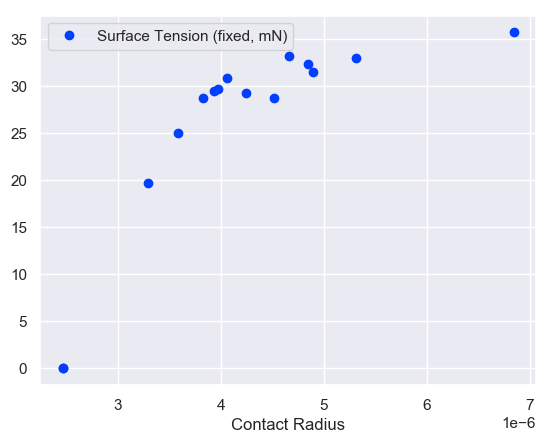

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000008        0.000004  1.021061e-06    1.023431e-06   
1      2   0.000009        0.000004  1.074508e-06    1.077356e-06   
2      3   0.000008        0.000004  1.015911e-06    1.015365e-06   
3      4   0.000008        0.000004  9.627259e-07    9.675138e-07   
0      1   0.000008        0.000004  1.021061e-06    1.023431e-06   
1      2   0.000009        0.000004  1.074508e-06    1.077356e-06   
2      3   0.000008        0.000004  1.015911e-06    1.015365e-06   
3      4   0.000008        0.000004  9.627259e-07    9.675138e-07   
0      1   0.000012        0.000007  2.229317e-06    2.231756e-06   
1      2   0.000008        0.000005  1.424188e-06    1.433289e-06   
2      3   0.000008        0.000005  1.520051e-06    1.526730e-06   
3      4   0.000007        0.000004  1.231673e-06    1.241456e-06   
0      1   0.000012        0.000007  2.229317e-06    2.231756e-06   
1      2   0.000008        0.000005  1.424188e-06    1.433289e-06   
2      3   0.000008        0.000005  1.520051e-06    1.526730e-06   
3      4   0.000007        0.000004  1.231673e-06    1.241456e-06   
0      1   0.000008        0.000002  3.947047e-07    4.014323e-07   
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   
6      7   0.000008        0.000002  3.918352e-07    3.964193e-07   
0      1   0.000008        0.000002  3.947047e-07    4.014323e-07   
1      2   0.000013        0.000005  9.767799e-07    9.799370e-07   
2      3   0.000013        0.000005  1.139518e-06    1.145605e-06   
3      4   0.000009        0.000004  7.094016e-07    7.101322e-07   
4      5   0.000010        0.000003  5.764563e-07    5.829021e-07   
5      6   0.000012        0.000005  8.655926e-07    8.682463e-07   
6      7   0.000008        0.000002  3.918352e-07    3.964193e-07   

         Volume    Volume raw  Drop contact angle  Max Adhesion  \
0  2.536093e-17  2.217834e-17           29.110347           NaN   
1  3.102204e-17  2.742845e-17           28.428051           NaN   
2  2.576628e-17  2.267945e-17           28.671446           NaN   
3  2.265756e-17  1.933068e-17           28.215104           NaN   
0  2.536093e-17  2.217834e-17           29.110347           NaN   
1  3.102204e-17  2.742845e-17           28.428051           NaN   
2  2.576628e-17  2.267945e-17           28.671446           NaN   
3  2.265756e-17  1.933068e-17           28.215104           NaN   
0  1.698734e-16  1.561849e-16           36.079489           NaN   
1  5.007016e-17  3.966157e-17           33.995807           NaN   
2  5.786234e-17  4.777917e-17           34.844440           NaN   
3  3.280749e-17  2.300836e-17           33.783088           NaN   
0  1.698734e-16  1.561849e-16           36.079489           NaN   
1  5.007016e-17  3.966157e-17           33.995807           NaN   
2  5.786234e-17  4.777917e-17           34.844440           NaN   
3  3.280749e-17  2.300836e-17           33.783088           NaN   
0  3.793078e-18  1.672164e-18           18.209539           NaN   
1  3.725375e-17  3.364477e-17           22.569331           NaN   
2  5.132737e-17  4.774780e-17           24.204475           NaN   
3  1.449691e-17  1.208895e-17           22.395062           NaN   
4  9.902275e-18  7.206930e-18           19.875563           NaN   
5  2.805058e-17  2.460484e-17           21.707893           NaN   
6  3.774934e-18  1.490840e-18           18.055830           NaN   
0  3.793078e-18  1.672164e-18           18.209539           NaN   
1  3.725375e-17  3.364477e-17           22.569331           NaN   
2  5.132737e-17  4.774780e-17           24.204475           NaN   
3  1.449691e-17  1.208895e-17           22.395062     

In [22]:
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[#'Surface Tension (rupture, mN)',
                        'Surface Tension (fixed, mN)'#,
                        #'Surface Tension FD (mN)'
                       ],
                             marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
display(fig3)
display(summary_df)

## Combine multiple FD curves

In [67]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

